<a href="https://colab.research.google.com/github/khoa2210/PTDL_R/blob/main/TKMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statistics as st
import numpy as np
import seaborn as sns

In [12]:
from google.colab import files
uploaded = files.upload()

Saving worldometer_coronavirus_summary_data.csv to worldometer_coronavirus_summary_data.csv


In [13]:
df = pd.read_csv("worldometer_coronavirus_summary_data.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         220 non-null    object 
 1   continent                       220 non-null    object 
 2   total_confirmed                 220 non-null    int64  
 3   total_deaths                    207 non-null    float64
 4   total_recovered                 219 non-null    float64
 5   active_cases                    219 non-null    float64
 6   serious_or_critical             146 non-null    float64
 7   total_cases_per_1m_population   220 non-null    int64  
 8   total_deaths_per_1m_population  204 non-null    float64
 9   total_tests                     210 non-null    float64
 10  total_tests_per_1m_population   210 non-null    float64
 11  population                      220 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

In [15]:
df.isna().any()

country                           False
continent                         False
total_confirmed                   False
total_deaths                       True
total_recovered                    True
active_cases                       True
serious_or_critical                True
total_cases_per_1m_population     False
total_deaths_per_1m_population     True
total_tests                        True
total_tests_per_1m_population      True
population                        False
dtype: bool

In [16]:
pd.DataFrame(df.mean().T)

,0
total_confirmed,9.021924e+05
total_deaths,2.044386e+04
total_recovered,8.106192e+05
active_cases,6.763399e+04
serious_or_critical,6.021781e+02
total_cases_per_1m_population,3.990132e+04
total_deaths_per_1m_population,7.071961e+02
total_tests,1.432069e+07
total_tests_per_1m_population,9.025879e+05
population,3.563921e+07


In [21]:
pd.DataFrame(df.median().T)


,0
total_confirmed,77337.5
total_deaths,1375.0
total_recovered,62863.0
active_cases,3488.0
serious_or_critical,36.5
total_cases_per_1m_population,26154.5
total_deaths_per_1m_population,363.5
total_tests,1315024.5
total_tests_per_1m_population,341641.0
population,6580660.0


In [22]:
pd.DataFrame(df.mode().T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219
country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Caribbean Netherlands,Cayman Islands,Central African Republic,Chad,...,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,State Of Palestine,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Trinidad And Tobago,Tunisia,Turkey,Turks And Caicos Islands,UK,USA,Uganda,Ukraine,United Arab Emirates,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis And Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
continent,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_confirmed,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_deaths,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_recovered,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_cases,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serious_or_critical,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cases_per_1m_population,9,13,15,16,17,28,65,67,90,224,231,294,328,465,540,574,577,631,657,673,699,762,771,819,826,852,938,975,1041,1256,1322,1411,1436,1446,1450,1453,1499,1544,1585,1745,...,82107,82275,82647,82668,82985,83347,83750,84025,85785,89166,91699,92979,92993,93644,93718,95075,95294,96592,98260,99016,100608,105386,105480,107279,108009,108196,108613,109367,109377,115980,120597,124668,140588,147417,150847,152526,155966,162265,183722,189643
total_deaths_per_1m_population,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_tests,1408,4500,4671,6128,

In [23]:
min = df.min (numeric_only= True)
max = df.max (numeric_only= True) 
f = pd.DataFrame(max - min)
f

,0
total_confirmed,3.573397e+07
total_deaths,6.292890e+05
total_recovered,3.081287e+07
active_cases,5.440082e+06
serious_or_critical,9.374000e+03
total_cases_per_1m_population,1.896340e+05
total_deaths_per_1m_population,5.863000e+03
total_tests,5.295759e+08
total_tests_per_1m_population,1.310854e+07
population,1.439323e+09


In [24]:
a = pd.DataFrame(df.var(skipna= True).T)
a

,0
total_confirmed,1.294899e+13
total_deaths,5.117556e+09
total_recovered,1.057217e+13
active_cases,1.496899e+11
serious_or_critical,2.641971e+06
total_cases_per_1m_population,1.772592e+09
total_deaths_per_1m_population,7.185204e+05
total_tests,2.998619e+15
total_tests_per_1m_population,2.708749e+12
population,1.966198e+16


In [25]:
b = pd.DataFrame(df.std(skipna= True).T)
b

,0
total_confirmed,3.598470e+06
total_deaths,7.153709e+04
total_recovered,3.251487e+06
active_cases,3.868977e+05
serious_or_critical,1.625414e+03
total_cases_per_1m_population,4.210216e+04
total_deaths_per_1m_population,8.476558e+02
total_tests,5.475965e+07
total_tests_per_1m_population,1.645828e+06
population,1.402212e+08


In [26]:
ql = pd.DataFrame(df.quantile([0.25,0.50,0.75]).T)
ql

,0.25,0.50,0.75
total_confirmed,7896.50,77337.5,409994.00
total_deaths,150.50,1375.0,8071.50
total_recovered,5355.00,62863.0,380964.00
active_cases,405.50,3488.0,20766.50
serious_or_critical,9.00,36.5,309.00
total_cases_per_1m_population,3090.50,26154.5,68381.00
total_deaths_per_1m_population,67.25,363.5,1069.50
total_tests,178743.00,1315024.5,6732616.50
total_tests_per_1m_population,88852.50,341641.0,1002095.00
population,634729.50,6580660.0,24183367.25


In [27]:
corr = df.corr()
corr

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
total_confirmed,1.000000,0.933806,0.997061,0.772801,0.807670,0.166922,0.222315,0.889319,0.003581,0.546699
total_deaths,0.933806,1.000000,0.936440,0.752891,0.838181,0.167923,0.359304,0.764497,-0.016773,0.446960
total_recovered,0.997061,0.936440,1.000000,0.722107,0.808626,0.163426,0.232789,0.879275,0.000884,0.570102
active_cases,0.772801,0.752891,0.722107,1.000000,0.585883,0.144901,0.184952,0.762212,0.032018,0.224496
serious_or_critical,0.807670,0.838181,0.808626,0.585883,1.000000,0.075595,0.226481,0.625110,-0.077008,0.443624
total_cases_per_1m_population,0.166922,0.167923,0.163426,0.144901,0.075595,1.000000,0.682981,0.120933,0.386261,-0.088459
total_deaths_per_1m_population,0.222315,0.359304,0.232789,0.184952,0.226481,0.682981,1.000000,0.133251,0.149971,-0.050190
total_tests,0.889319,0.764497,0.879275,0.762212,0.625110,0.120933,0.133251,1.000000,0.132551,0.647815
total_tests_per_1m_population,0.003581,-0.016773,0.000884,0.032018,-0.077008,0.386261,0.149971,0.132551,1.000000,-0.081069
population,0.546699,0.446960,0.570102,0.224496,0.443624,-0.088459,-0.050190,0.647815,-0.081069,1.000000


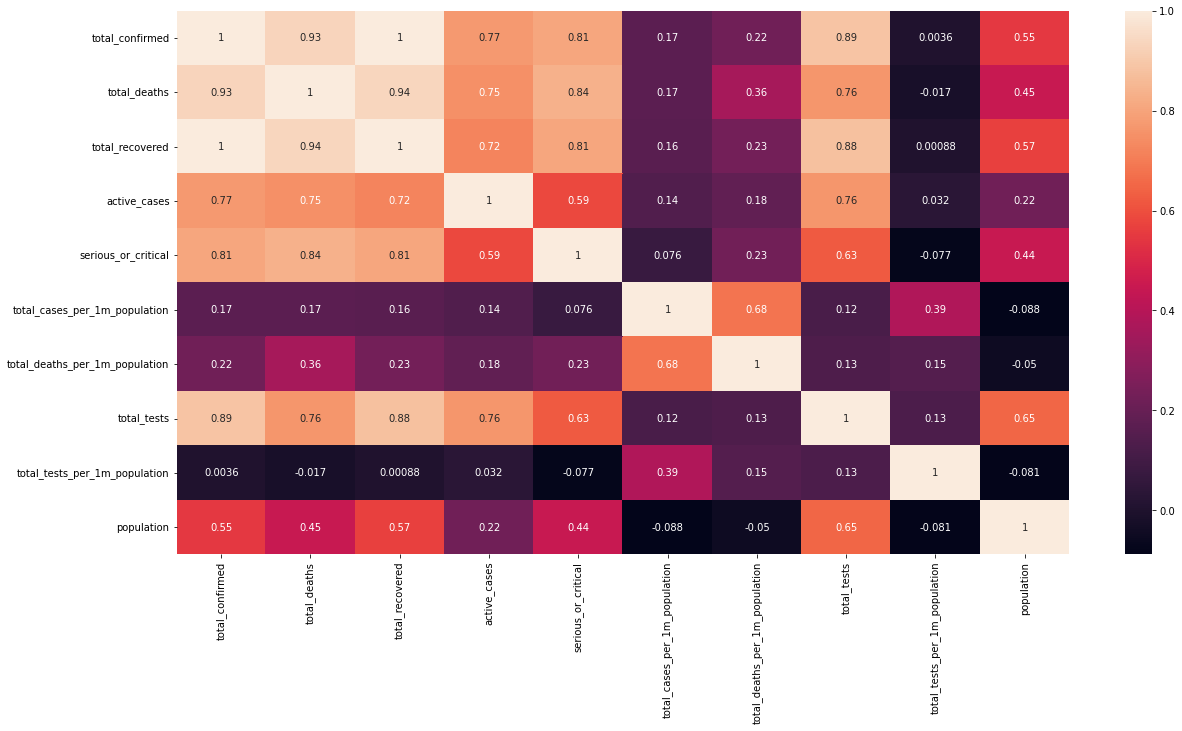

In [30]:
plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


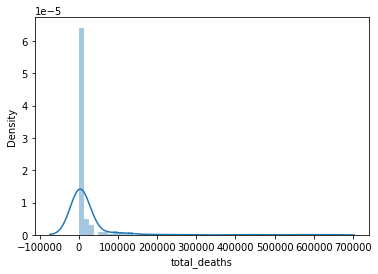

In [32]:
sns.distplot(df["total_deaths"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66542ba450>,
      dtype=object)

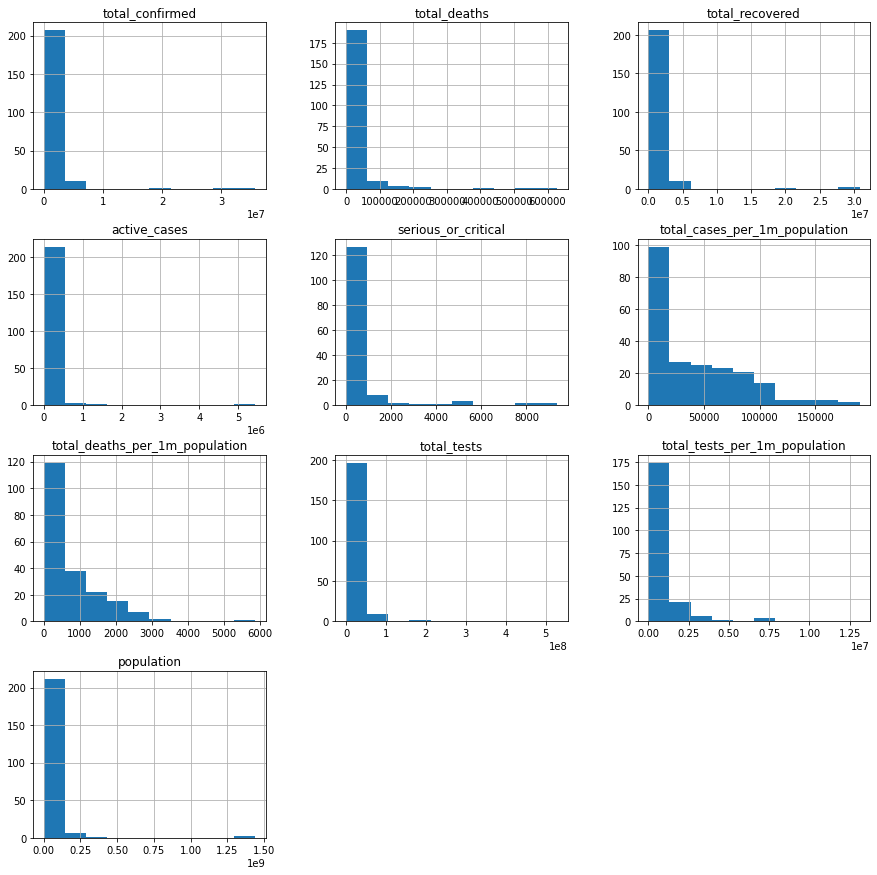

In [34]:
df.hist(figsize=(15,15))